<a href="https://colab.research.google.com/github/ussalbt/Python/blob/main/military_power_assignment_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Military Power Clustering Project
-World military power
Source : globalfirepower.com on 1st may 2020

- https://data.world/vizzup/world-military-power/workspace/file?filename=World+military+power.xlsx


# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
#import pyforest
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, StandardScaler, PowerTransformer, MinMaxScaler, RobustScaler
from sklearn.model_selection import KFold, cross_val_predict, train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.metrics import plot_confusion_matrix, r2_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostClassifier
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif, f_regression, mutual_info_regression
from xgboost import XGBRegressor, XGBClassifier
from xgboost import plot_importance
from sklearn.pipeline import Pipeline
from sklearn.tree import plot_tree
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)

# pd.set_option('display.max_rows', 100) # if you wish to see more rows rather than default, just uncomment this line.
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)



In [ ]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

In [ ]:
def first_looking(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()/df.shape[0]*100, 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print(df[col].value_counts(dropna = False))

In [ ]:
def train_val(y_train, y_train_pred, y_test, y_pred):
    
    scores = {"train_set": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test_set": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [ ]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

# Ingest Data  

In [ ]:
df0 = pd.read_excel("/content/sample_data/World military power.xlsx", header=1)
df = df0.copy()

# EDA

## Implement basic steps to see how is your data looks like

In [ ]:
df.head()

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
0,Afghanistan,1.344,Afghanistan,260.000,Afghanistan,0.000,Afghanistan,25.000,Afghanistan,30.000,Afghanistan,0.000,Afghanistan,187.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,1062.000,Afghanistan,0.000,Afghanistan,176.000,Afghanistan,50.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43.000,Afghanistan,0.000,Afghanistan,5500.000,Afghanistan,0.000,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0.000,Afghanistan,1200.000,Afghanistan,5987.000
1,Albania,2.314,Albania,19.000,Albania,0.000,Albania,0.000,Albania,0.000,Albania,0.000,Albania,19.000,Albania,0.000,Albania,0.000,Albania,467.000,Albania,0.000,Albania,0.000,Albania,0.000,Albania,38.000,Albania,0.000,Albania,0.000,Albania,0.000,Albania,0.000,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4.000,Albania,16000.000,Albania,42500.000,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748.000,Albania,362.000,Albania,41.000,Albania,691.000
2,Algeria,0.466,Algeria,551.000,Algeria,103.000,Algeria,22.000,Algeria,59.000,Algeria,87.000,Algeria,257.000,Algeria,45.000,Algeria,880.000,Algeria,7361.000,Algeria,320.000,Algeria,240.000,Algeria,316.000,Algeria,201.000,Algeria,0.000,Algeria,6.000,Algeria,0.000,Algeria,5.000,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,157.000,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998.000,Algeria,0.000,Algeria,6734.000
3,Angola,0.838,Angola,295.000,Angola,72.000,Angola,18.000,Angola,30.000,Angola,47.000,Angola,126.000,Angola,15.000,Angola,379.000,Angola,595.000,Angola,28.000,Angola,357.000,Angola,115.000,Angola,57.000,Angola,0.000,Angola,0.000,Angola,0.000,Angola,0.000,Angola,"7,00,00,00,000",Angola,"42,08,00,00,000",Angola,176.000,Angola,"16,66,000",Angola,82300.000,Angola,"8,27,30,00,000",Angola,"62,44,205",Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600.000,Angola,1300.000,Angola,5369.000
4,Argentina,0.652,Argentina,227.000,Argentina,24.000,Argentina,7.000,Argentina,9.000,Argentina,64.000,Argentina,100.000,Argentina,0.000,Argentina,370.000,Argentina,739.000,Argentina,83.000,Argentina,172.000,Argentina,26.000,Argentina,49.000,Argentina,0.000,Argentina,2.000,Argentina,4.000,Argentina,0.000,Argentina,"4,20,00,00,000",Argentina,"2,14,90

In [ ]:
df.tail()

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
133,Venezuela,0.645,Venezuela,260.000,Venezuela,38.000,Venezuela,0.000,Venezuela,52.000,Venezuela,82.000,Venezuela,86.000,Venezuela,10.000,Venezuela,390.000,Venezuela,600.000,Venezuela,73.000,Venezuela,104.000,Venezuela,36.000,Venezuela,49.000,Venezuela,0.000,Venezuela,2.000,Venezuela,0.000,Venezuela,4.000,Venezuela,"74,50,00,000",Venezuela,"1,00,30,00,00,000",Venezuela,444.000,Venezuela,"20,07,000",Venezuela,"5,75,000",Venezuela,"3,00,90,00,00,000",Venezuela,"1,42,60,129",Venezuela,"3,16,89,176",Venezuela,"9,12,050",Venezuela,2800.000,Venezuela,7100.000,Venezuela,5267.000
134,Vietnam,0.356,Vietnam,293.000,Vietnam,77.000,Vietnam,0.000,Vietnam,38.000,Vietnam,36.000,Vietnam,138.000,Vietnam,25.000,Vietnam,2615.000,Vietnam,2530.000,Vietnam,70.000,Vietnam,1000.000,Vietnam,85.000,Vietnam,65.000,Vietnam,0.000,Vietnam,6.000,Vietnam,0.000,Vietnam,9.000,Vietnam,"5,50,00,00,000",Vietnam,"96,58,00,00,000",Vietnam,45.000,Vietnam,"2,71,400",Vietnam,"5,25,000",Vietnam,"4,40,00,00,000",Vietnam,"5,10,43,216",Vietnam,"9,70,40,334",Vietnam,"3,31,210",Vietnam,3444.000,Vietnam,17702.000,Vietnam,4616.000
135,Yemen,1.241,Yemen,169.000,Yemen,77.000,Yemen,0.000,Yemen,8.000,Yemen,21.000,Yemen,61.000,Yemen,14.000,Yemen,620.000,Yemen,615.000,Yemen,20.000,Yemen,85.000,Yemen,150.000,Yemen,30.000,Yemen,0.000,Yemen,0.000,Yemen,0.000,Yemen,0.000,Yemen,"1,40,00,00,000",Yemen,"7,06,80,00,000",Yemen,57.000,Yemen,12260.000,Yemen,"1,45,000",Yemen,"3,00,00,00,000",Yemen,"1,12,66,221",Yemen,"2,86,67,230",Yemen,"5,27,968",Yemen,1906.000,Yemen,0.000,Yemen,1601.000
136,Zambia,1.646,Zambia,108.000,Zambia,18.000,Zambia,0.000,Zambia,11.000,Zambia,52.000,Zambia,27.000,Zambia,0.000,Zambia,75.000,Zambia,184.000,Zambia,0.000,Zambia,42.000,Zambia,50.000,Zambia,0.000,Zambia,0.000,Zambia,0.000,Zambia,0.000,Zambia,0.000,Zambia,"4,00,00,000",Zambia,"11,66,00,00,000",Zambia,88.000,Zambia,0.000,Zambia,21000.000,Zambia,0.000,Zambia,"61,66,905",Zambia,"1,64,45,079",Zambia,"7,52,618",NaN,NaN,Zambia,2250.000,Zambia,6043.000
137,Zimbabwe,1.758,Zimbabwe,90.000,Zimbabwe,10.000,Zimbabwe,0.000,Zimbabwe,14.000,Zimbabwe,38.000,Zimbabwe,28.000,Zimbabwe,6.000,Zimbabwe,42.000,Zimbabwe,300.000,Zimbabwe,0.000,Zimbabwe,65.000,Zimbabwe,22.000,Zimbabwe,0.000,Zimbabwe,0.000,Zimbabwe,0.000,Zimbabwe,0.000,Zimbabwe,0.000,Zimbabwe,"10,00,00,000",Zimbabwe,"9,35,70,00,000",Zimbabwe,196.000,Zimbabwe,0.000,Zimbabwe,19500.000,Zimbabwe,0.000,Zimbabwe,"55,84,086",Zimbabwe,"1,40,30,368",Zimbab

In [ ]:
df.sample(10)

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
109,South Africa,0.498,South Africa,226.000,South Africa,17.000,South Africa,0.000,South Africa,23.000,South Africa,88.000,South Africa,91.000,South Africa,12.000,South Africa,195.000,South Africa,2000.000,South Africa,43.000,South Africa,72.000,South Africa,50.000,South Africa,30.000,South Africa,0.000,South Africa,3.000,South Africa,0.000,South Africa,4.000,South Africa,"4,27,80,00,000",South Africa,"1,56,30,00,00,000",South Africa,566.000,South Africa,2000.000,South Africa,"6,05,000",South Africa,"1,50,00,000",South Africa,"2,62,50,220",South Africa,"5,53,80,210",South Africa,"12,19,090",South Africa,2798.000,South Africa,0.000,South Africa,5244.000
83,New Zealand,1.368,New Zealand,48.000,New Zealand,0.000,New Zealand,0.000,New Zealand,7.000,New Zealand,13.000,New Zealand,22.000,New Zealand,0.000,New Zealand,0.000,New Zealand,200.000,New Zealand,0.000,New Zealand,24.000,New Zealand,0.000,New Zealand,11.000,New Zealand,0.000,New Zealand,0.000,New Zealand,0.000,New Zealand,2.000,New Zealand,"4,30,00,00,000",New Zealand,"91,62,00,00,000",New Zealand,123.000,New Zealand,31480.000,New Zealand,"1,50,000",New Zealand,"5,69,00,000",New Zealand,"21,15,989",New Zealand,"45,45,627",New Zealand,"2,67,710",New Zealand,15134.000,New Zealand,0.000,NaN,NaN
47,Honduras,2.094,Honduras,46.000,Honduras,3.000,Honduras,9.000,Honduras,11.000,Honduras,10.000,Honduras,12.000,Honduras,0.000,Honduras,19.000,Honduras,92.000,Honduras,0.000,Honduras,176.000,Honduras,0.000,Honduras,59.000,Honduras,0.000,Honduras,0.000,Honduras,0.000,Honduras,0.000,Honduras,"20,50,00,000",Honduras,"8,62,50,00,000",Honduras,103.000,Honduras,0.000,Honduras,60000.000,Honduras,0.000,Honduras,"41,04,696",Honduras,"91,82,766",Honduras,"1,12,090",Honduras,832.000,Honduras,465.000,Honduras,1575.000
92,Panama,3.654,Panama,39.000,Panama,0.000,Panama,0.000,Panama,11.000,Panama,4.000,Panama,23.000,Panama,0.000,Panama,0.000,Panama,65.000,Panama,0.000,Panama,0.000,Panama,0.000,Panama,20.000,Panama,0.000,Panama,0.000,Panama,0.000,Panama,0.000,Panama,"50,00,00,000",Panama,"91,53,00,00,000",Panama,117.000,Panama,0.000,Panama,"1,00,000",Panama,0.000,Panama,"17,59,698",Panama,"38,00,644",Panama,75420.000,Panama,2490.000,Panama,800.000,Panama,687.000
126,Uganda,1.618,Uganda,48.000,Uganda,10.000,Uganda,0.000,Uganda,2.000,Uganda,10.000,Uganda,26.000,Uganda,5.000,Uganda,371.000,Uganda,1081.000,Uganda,6.000,Uganda,53.000,Uganda,26.000,Uganda,8.000,Uganda,0.000,Uganda,0.000,U

In [ ]:
df.columns

Index(['Military Strength', 'Military Strength Power Index',
       'Aircraft Strength', 'Aircraft Strength value',
       'Fighter/Interceptor Strength', 'Fighter/Interceptor Strength value',
       'Attack Aircraft Strength', 'Attack Aircraft Strength value',
       'Transport Aircraft Fleet Strength',
       'Transport Aircraft Fleet Strength value', 'Trainer Aircraft Fleet',
       'Trainer Aircraft Fleet value', 'Helicopter Fleet Strength',
       'Helicopter Fleet Strength value', 'Attack Helicopter Fleet Strength',
       'Attack Helicopter Fleet Strength value', 'Tank Strength',
       'Tank Strength value', 'AFV/APC Strength', 'AFV/APC Strength value',
       'Self-Propelled Artillery Strength',
       'Self-Propelled Artillery Strength value', 'Towed Artillery Strength',
       'Towed Artillery Strength value', 'Rocket Projector Strength',
       'Rocket Projector Strength value', 'Navy Fleet Strengths',
       'Navy Fleet Strengths value', 'Aircraft Carrier Fleet Strength',


In [ ]:
df.columns = df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

In [ ]:
df.columns

Index(['military_strength', 'military_strength_power_index',
       'aircraft_strength', 'aircraft_strength_value',
       'fighter/interceptor_strength', 'fighter/interceptor_strength_value',
       'attack_aircraft_strength', 'attack_aircraft_strength_value',
       'transport_aircraft_fleet_strength',
       'transport_aircraft_fleet_strength_value', 'trainer_aircraft_fleet',
       'trainer_aircraft_fleet_value', 'helicopter_fleet_strength',
       'helicopter_fleet_strength_value', 'attack_helicopter_fleet_strength',
       'attack_helicopter_fleet_strength_value', 'tank_strength',
       'tank_strength_value', 'afv/apc_strength', 'afv/apc_strength_value',
       'self-propelled_artillery_strength',
       'self-propelled_artillery_strength_value', 'towed_artillery_strength',
       'towed_artillery_strength_value', 'rocket_projector_strength',
       'rocket_projector_strength_value', 'navy_fleet_strengths',
       'navy_fleet_strengths_value', 'aircraft_carrier_fleet_strength',


In [ ]:
df.shape

(138, 60)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   military_strength                        138 non-null    object 
 1   military_strength_power_index            138 non-null    float64
 2   aircraft_strength                        138 non-null    object 
 3   aircraft_strength_value                  138 non-null    float64
 4   fighter/interceptor_strength             138 non-null    object 
 5   fighter/interceptor_strength_value       138 non-null    float64
 6   attack_aircraft_strength                 138 non-null    object 
 7   attack_aircraft_strength_value           138 non-null    float64
 8   transport_aircraft_fleet_strength        138 non-null    object 
 9   transport_aircraft_fleet_strength_value  138 non-null    float64
 10  trainer_aircraft_fleet                   138 non-n

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
military_strength_power_index,138.000,1.461,1.324,0.061,0.575,1.034,2.022,10.168
aircraft_strength_value,138.000,388.471,1231.982,0.000,33.000,111.000,290.250,13264.000
fighter/interceptor_strength_value,138.000,81.565,230.325,0.000,0.000,17.000,60.500,2085.000
attack_aircraft_strength_value,138.000,25.761,94.528,0.000,0.000,0.000,15.750,742.000
transport_aircraft_fleet_strength_value,138.000,30.232,92.330,0.000,3.000,9.000,26.000,945.000
trainer_aircraft_fleet_value,138.000,82.833,240.804,0.000,4.250,26.000,79.250,2643.000
helicopter_fleet_strength_value,138.000,154.065,520.184,0.000,15.250,44.000,126.750,5768.000
attack_helicopter_fleet_strength_value,138.000,25.623,97.326,0.000,0.000,2.000,17.750,967.000
tank_strength_value,138.000,646.565,1515.464,0.000,19.250,153.000,436.250,12950.000
afv/apc_strength_value,138.000,2485.696,5410.546,0.000,250.250,734.500,2000.000,39253.000


In [ ]:
df.describe(include=object).T

,count,unique,top,freq
military_strength,138,138,Afghanistan,1
aircraft_strength,138,138,Afghanistan,1
fighter/interceptor_strength,138,138,Afghanistan,1
attack_aircraft_strength,138,138,Afghanistan,1
transport_aircraft_fleet_strength,138,138,Afghanistan,1
trainer_aircraft_fleet,138,138,Afghanistan,1
helicopter_fleet_strength,138,138,Afghanistan,1
attack_helicopter_fleet_strength,138,138,Afghanistan,1
tank_strength,138,138,Afghanistan,1
afv/apc_strength,138,138,Afghanistan,1


In [ ]:
df.nunique()

military_strength                          138
military_strength_power_index              138
aircraft_strength                          138
aircraft_strength_value                    113
fighter/interceptor_strength               138
fighter/interceptor_strength_value          63
attack_aircraft_strength                   138
attack_aircraft_strength_value              38
transport_aircraft_fleet_strength          138
transport_aircraft_fleet_strength_value     49
trainer_aircraft_fleet                     138
trainer_aircraft_fleet_value                77
helicopter_fleet_strength                  138
helicopter_fleet_strength_value             97
attack_helicopter_fleet_strength           138
attack_helicopter_fleet_strength_value      45
tank_strength                              138
tank_strength_value                        106
afv/apc_strength                           138
afv/apc_strength_value                     130
self-propelled_artillery_strength          138
self-propelle

In [ ]:
# to find how many unique values object features have
for col in df.select_dtypes(include=[np.number]).columns:
  print(f"{col} has {df[col].nunique()} unique value")

military_strength_power_index has 138 unique value
aircraft_strength_value has 113 unique value
fighter/interceptor_strength_value has 63 unique value
attack_aircraft_strength_value has 38 unique value
transport_aircraft_fleet_strength_value has 49 unique value
trainer_aircraft_fleet_value has 77 unique value
helicopter_fleet_strength_value has 97 unique value
attack_helicopter_fleet_strength_value has 45 unique value
tank_strength_value has 106 unique value
afv/apc_strength_value has 130 unique value
self-propelled_artillery_strength_value has 70 unique value
towed_artillery_strength_value has 91 unique value
rocket_projector_strength_value has 68 unique value
navy_fleet_strengths_value has 78 unique value
aircraft_carrier_fleet_strength_value has 5 unique value
submarine_fleet_strength_value has 20 unique value
destroyer_fleet_strength_value has 11 unique value
frigate_fleet_strength_value has 18 unique value
airport_totals_value has 108 unique value
total_border_coverage_value has 1

In [ ]:
df.duplicated().value_counts()

False    138
dtype: int64

## Convert multi index columns to one level

In [ ]:
df.head()

,military_strength,military_strength_power_index,aircraft_strength,aircraft_strength_value,fighter/interceptor_strength,fighter/interceptor_strength_value,attack_aircraft_strength,attack_aircraft_strength_value,transport_aircraft_fleet_strength,transport_aircraft_fleet_strength_value,trainer_aircraft_fleet,trainer_aircraft_fleet_value,helicopter_fleet_strength,helicopter_fleet_strength_value,attack_helicopter_fleet_strength,attack_helicopter_fleet_strength_value,tank_strength,tank_strength_value,afv/apc_strength,afv/apc_strength_value,self-propelled_artillery_strength,self-propelled_artillery_strength_value,towed_artillery_strength,towed_artillery_strength_value,rocket_projector_strength,rocket_projector_strength_value,navy_fleet_strengths,navy_fleet_strengths_value,aircraft_carrier_fleet_strength,aircraft_carrier_fleet_strength_value,submarine_fleet_strength,submarine_fleet_strength_value,destroyer_fleet_strength,destroyer_fleet_strength_value,frigate_fleet_strength,frigate_fleet_strength_value,defense_spending_budget,defense_spending_budget_value,external_debt,external_debt_value,airport_totals,airport_totals_value,oil_production,oil_production_value,oil_consumption,oil_consumption_value,proven_oil_reserves,proven_oil_reserves_value,available_manpower,available_manpower_value,total_population,total_population_value,total_square_land_area,total_square_land_area_value,total_coastline_coverage,total_coastline_coverage_value,total_waterway_coverage,total_waterway_coverage_value,total_border_coverage,total_border_coverage_value
0,Afghanistan,1.344,Afghanistan,260.000,Afghanistan,0.000,Afghanistan,25.000,Afghanistan,30.000,Afghanistan,0.000,Afghanistan,187.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,1062.000,Afghanistan,0.000,Afghanistan,176.000,Afghanistan,50.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43.000,Afghanistan,0.000,Afghanistan,5500.000,Afghanistan,0.000,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0.000,Afghanistan,1200.000,Afghanistan,5987.000
1,Albania,2.314,Albania,19.000,Albania,0.000,Albania,0.000,Albania,0.000,Albania,0.000,Albania,19.000,Albania,0.000,Albania,0.000,Albania,467.000,Albania,0.000,Albania,0.000,Albania,0.000,Albania,38.000,Albania,0.000,Albania,0.000,Albania,0.000,Albania,0.000,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4.000,Albania,16000.000,Albania,42500.000,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748.000,Albania,362.000,Albania,41.000,Albania,691.000
2,Algeria,0.466,Algeria,551.000,Algeria,103.000,Algeria,22.000,Algeria,59.000,Algeria,87.000,Algeria,257.000,Algeria,45.000,Algeria,880.000,Algeria,7361.000,Algeria,320.000,Algeria,240.000,Algeria,316.000,Algeria,201.000,Algeria,0.000,Algeria,6.000,Algeria,0.000,Algeria,5.000,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,157.000,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998.000,Algeria,0.000,Algeria,6734.000
3,Angola,0.838,Angola,295.000,Angola,72.000,Angola,18.000,Angola,30.000,Angola,47.000,Angola,126.000,Angola,15.000,Angola,379.000,Angola,595.000,Angola,28.000,Angola,357.000,Angola,115.000,Angola,57.000,Angola,0.000,Angola,0.000,Angola,0.000,Angola,0.000,Angola,"7,00,00,00,000",Angola,"42,08,00,00,000",Angola,176.000,Angola,"16,66,000",Angola,82300.000,Angola,"8,27,30,00,000",Angola,"62,44,205",Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600.000,Angola,1300.000,Angola,5369.000
4,Argentina,0.652,Argentina,227.000,Argentina,24.000,Argentina,7.000,Argentina,9.000,Argentina,64.000,Argentina,100.000,Argentina,0.000,Argentina,370.000,Argentina,739.000,Argentina,83.000,Argentina,172.000,Argentina,26.000,Argentina,49.000,Argentina,0.000,Argentina,2.000,Argentina,4.000,Argentina,0.000,Argentina,"4,20,00,00,000",Argentina,"2,14,90

In [ ]:
df.rename(columns={'military_strength': 'country'}, inplace=True)

In [ ]:
df.head(1)

,country,military_strength_power_index,aircraft_strength,aircraft_strength_value,fighter/interceptor_strength,fighter/interceptor_strength_value,attack_aircraft_strength,attack_aircraft_strength_value,transport_aircraft_fleet_strength,transport_aircraft_fleet_strength_value,trainer_aircraft_fleet,trainer_aircraft_fleet_value,helicopter_fleet_strength,helicopter_fleet_strength_value,attack_helicopter_fleet_strength,attack_helicopter_fleet_strength_value,tank_strength,tank_strength_value,afv/apc_strength,afv/apc_strength_value,self-propelled_artillery_strength,self-propelled_artillery_strength_value,towed_artillery_strength,towed_artillery_strength_value,rocket_projector_strength,rocket_projector_strength_value,navy_fleet_strengths,navy_fleet_strengths_value,aircraft_carrier_fleet_strength,aircraft_carrier_fleet_strength_value,submarine_fleet_strength,submarine_fleet_strength_value,destroyer_fleet_strength,destroyer_fleet_strength_value,frigate_fleet_strength,frigate_fleet_strength_value,defense_spending_budget,defense_spending_budget_value,external_debt,external_debt_value,airport_totals,airport_totals_value,oil_production,oil_production_value,oil_consumption,oil_consumption_value,proven_oil_reserves,proven_oil_reserves_value,available_manpower,available_manpower_value,total_population,total_population_value,total_square_land_area,total_square_land_area_value,total_coastline_coverage,total_coastline_coverage_value,total_waterway_coverage,total_waterway_coverage_value,total_border_coverage,total_border_coverage_value
0,Afghanistan,1.344,Afghanistan,260.000,Afghanistan,0.000,Afghanistan,25.000,Afghanistan,30.000,Afghanistan,0.000,Afghanistan,187.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,1062.000,Afghanistan,0.000,Afghanistan,176.000,Afghanistan,50.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43.000,Afghanistan,0.000,Afghanistan,5500.000,Afghanistan,0.000,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0.000,Afghanistan,1200.000,Afghanistan,5987.000


## Detect and drop duplicated columns

In [ ]:
df.columns

Index(['country', 'military_strength_power_index', 'aircraft_strength',
       'aircraft_strength_value', 'fighter/interceptor_strength',
       'fighter/interceptor_strength_value', 'attack_aircraft_strength',
       'attack_aircraft_strength_value', 'transport_aircraft_fleet_strength',
       'transport_aircraft_fleet_strength_value', 'trainer_aircraft_fleet',
       'trainer_aircraft_fleet_value', 'helicopter_fleet_strength',
       'helicopter_fleet_strength_value', 'attack_helicopter_fleet_strength',
       'attack_helicopter_fleet_strength_value', 'tank_strength',
       'tank_strength_value', 'afv/apc_strength', 'afv/apc_strength_value',
       'self-propelled_artillery_strength',
       'self-propelled_artillery_strength_value', 'towed_artillery_strength',
       'towed_artillery_strength_value', 'rocket_projector_strength',
       'rocket_projector_strength_value', 'navy_fleet_strengths',
       'navy_fleet_strengths_value', 'aircraft_carrier_fleet_strength',
       'aircraft_

In [ ]:
drop_columns = ['aircraft_strength',
               'fighter/interceptor_strength',
               'attack_aircraft_strength',
               'transport_aircraft_fleet_strength',
               'trainer_aircraft_fleet',
               'helicopter_fleet_strength',
               'attack_helicopter_fleet_strength',
               'tank_strength',
               'afv/apc_strength',
               'self-propelled_artillery_strength',
               'towed_artillery_strength',
               'rocket_projector_strength',
               'navy_fleet_strengths',
               'aircraft_carrier_fleet_strength',
               'submarine_fleet_strength',
               'destroyer_fleet_strength',
               'frigate_fleet_strength',
               'defense_spending_budget',
               'external_debt',
               'airport_totals', 
               'oil_production',
               'oil_consumption',
               'proven_oil_reserves',
               'available_manpower',
               'total_population',
               'total_square_land_area',
               'total_coastline_coverage',
               'total_waterway_coverage',
               'total_border_coverage',
               ]

In [ ]:
df.drop(drop_columns, axis = 1, inplace = True)

In [ ]:
df.head(1)

,country,military_strength_power_index,aircraft_strength_value,fighter/interceptor_strength_value,attack_aircraft_strength_value,transport_aircraft_fleet_strength_value,trainer_aircraft_fleet_value,helicopter_fleet_strength_value,attack_helicopter_fleet_strength_value,tank_strength_value,afv/apc_strength_value,self-propelled_artillery_strength_value,towed_artillery_strength_value,rocket_projector_strength_value,navy_fleet_strengths_value,aircraft_carrier_fleet_strength_value,submarine_fleet_strength_value,destroyer_fleet_strength_value,frigate_fleet_strength_value,defense_spending_budget_value,external_debt_value,airport_totals_value,oil_production_value,oil_consumption_value,proven_oil_reserves_value,available_manpower_value,total_population_value,total_square_land_area_value,total_coastline_coverage_value,total_waterway_coverage_value,total_border_coverage_value
0,Afghanistan,1.344,260.000,0.000,25.000,30.000,0.000,187.000,0.000,0.000,1062.000,0.000,176.000,50.000,0.000,0.000,0.000,0.000,0.000,"12,00,00,00,000","2,84,00,00,000",43.000,0.000,5500.000,0.000,"1,43,25,743","3,49,40,837","6,52,230",0.000,1200.000,5987.000


In [ ]:
df.shape

(138, 31)

## Check for missing values 

In [ ]:
missing (df)

,Missing_Number,Missing_Percent
total_coastline_coverage_value,29,0.210
aircraft_carrier_fleet_strength_value,23,0.167
frigate_fleet_strength_value,23,0.167
destroyer_fleet_strength_value,23,0.167
submarine_fleet_strength_value,23,0.167
navy_fleet_strengths_value,14,0.101
total_border_coverage_value,9,0.065
helicopter_fleet_strength_value,0,0.000
attack_helicopter_fleet_strength_value,0,0.000
total_waterway_coverage_value,0,0.000


## Deal with missing values 
* Hint-1, use wikipedia to fill in missing values ​​comparing with similar countries
* Hint-2, Georeferences of countries can help you

In [ ]:
df.loc[(df['country']=="South Korea") & (df['submarine_fleet_strength_value'].isnull()), 'submarine_fleet_strength_value'] = 22

In [ ]:
df.loc[(df['country']=="South Korea") & (df['frigate_fleet_strength_value'].isnull()), 'frigate_fleet_strength_value'] = 4

In [ ]:
df.loc[(df['country']=="South Korea") & (df['destroyer_fleet_strength_value'].isnull()), 'destroyer_fleet_strength_value'] = 12

In [ ]:
missing (df)

,Missing_Number,Missing_Percent
total_coastline_coverage_value,29,0.210
aircraft_carrier_fleet_strength_value,23,0.167
frigate_fleet_strength_value,22,0.159
destroyer_fleet_strength_value,22,0.159
submarine_fleet_strength_value,22,0.159
navy_fleet_strengths_value,14,0.101
total_border_coverage_value,9,0.065
helicopter_fleet_strength_value,0,0.000
attack_helicopter_fleet_strength_value,0,0.000
total_waterway_coverage_value,0,0.000


In [ ]:
df.fillna(0, inplace=True)

In [ ]:
missing(df)

,Missing_Number,Missing_Percent
country,0,0.000
submarine_fleet_strength_value,0,0.000
total_waterway_coverage_value,0,0.000
total_coastline_coverage_value,0,0.000
total_square_land_area_value,0,0.000
total_population_value,0,0.000
available_manpower_value,0,0.000
proven_oil_reserves_value,0,0.000
oil_consumption_value,0,0.000
oil_production_value,0,0.000


In [ ]:
df = df.reset_index()   # df = df.reset_index(drop = True)
del df['index']

In [ ]:
df.head()

,country,military_strength_power_index,aircraft_strength_value,fighter/interceptor_strength_value,attack_aircraft_strength_value,transport_aircraft_fleet_strength_value,trainer_aircraft_fleet_value,helicopter_fleet_strength_value,attack_helicopter_fleet_strength_value,tank_strength_value,afv/apc_strength_value,self-propelled_artillery_strength_value,towed_artillery_strength_value,rocket_projector_strength_value,navy_fleet_strengths_value,aircraft_carrier_fleet_strength_value,submarine_fleet_strength_value,destroyer_fleet_strength_value,frigate_fleet_strength_value,defense_spending_budget_value,external_debt_value,airport_totals_value,oil_production_value,oil_consumption_value,proven_oil_reserves_value,available_manpower_value,total_population_value,total_square_land_area_value,total_coastline_coverage_value,total_waterway_coverage_value,total_border_coverage_value
0,Afghanistan,1.344,260.000,0.000,25.000,30.000,0.000,187.000,0.000,0.000,1062.000,0.000,176.000,50.000,0.000,0.000,0.000,0.000,0.000,"12,00,00,00,000","2,84,00,00,000",43.000,0.000,5500.000,0.000,"1,43,25,743","3,49,40,837","6,52,230",0.000,1200.000,5987.000
1,Albania,2.314,19.000,0.000,0.000,0.000,0.000,19.000,0.000,0.000,467.000,0.000,0.000,0.000,38.000,0.000,0.000,0.000,0.000,"25,00,00,000","9,50,50,00,000",4.000,16000.000,42500.000,"16,83,00,000","15,19,438","30,57,220",28748.000,362.000,41.000,691.000
2,Algeria,0.466,551.000,103.000,22.000,59.000,87.000,257.000,45.000,880.000,7361.000,320.000,240.000,316.000,201.000,0.000,6.000,0.000,5.000,"13,00,00,00,000","6,26,00,00,000",157.000,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998.000,0.000,6734.000
3,Angola,0.838,295.000,72.000,18.000,30.000,47.000,126.000,15.000,379.000,595.000,28.000,357.000,115.000,57.000,0.000,0.000,0.000,0.000,"7,00,00,00,000","42,08,00,00,000",176.000,"16,66,000",82300.000,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600.000,1300.000,5369.000
4,Argentina,0.652,227.000,24.000,7.000,9.000,64.000,100.000,0.000,370.000,739.000,83.000,172.000,26.000,49.000,0.000,2.000,4.000,0.000,"4,20,00,00,000","2,14,90,00,00,000",1138.000,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989.000,11000.000,11968.000


In [ ]:
df.set_index('country', inplace=True)

In [ ]:
df.head(1)

,military_strength_power_index,aircraft_strength_value,fighter/interceptor_strength_value,attack_aircraft_strength_value,transport_aircraft_fleet_strength_value,trainer_aircraft_fleet_value,helicopter_fleet_strength_value,attack_helicopter_fleet_strength_value,tank_strength_value,afv/apc_strength_value,self-propelled_artillery_strength_value,towed_artillery_strength_value,rocket_projector_strength_value,navy_fleet_strengths_value,aircraft_carrier_fleet_strength_value,submarine_fleet_strength_value,destroyer_fleet_strength_value,frigate_fleet_strength_value,defense_spending_budget_value,external_debt_value,airport_totals_value,oil_production_value,oil_consumption_value,proven_oil_reserves_value,available_manpower_value,total_population_value,total_square_land_area_value,total_coastline_coverage_value,total_waterway_coverage_value,total_border_coverage_value
country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.344,260.000,0.000,25.000,30.000,0.000,187.000,0.000,0.000,1062.000,0.000,176.000,50.000,0.000,0.000,0.000,0.000,0.000,"12,00,00,00,000","2,84,00,00,000",43.000,0.000,5500.000,0.000,"1,43,25,743","3,49,40,837","6,52,230",0.000,1200.000,5987.000


In [ ]:
df.shape

(138, 30)

## Fix the dtypes

In [ ]:
df.dtypes

military_strength_power_index              float64
aircraft_strength_value                    float64
fighter/interceptor_strength_value         float64
attack_aircraft_strength_value             float64
transport_aircraft_fleet_strength_value    float64
trainer_aircraft_fleet_value               float64
helicopter_fleet_strength_value            float64
attack_helicopter_fleet_strength_value     float64
tank_strength_value                        float64
afv/apc_strength_value                     float64
self-propelled_artillery_strength_value    float64
towed_artillery_strength_value             float64
rocket_projector_strength_value            float64
navy_fleet_strengths_value                 float64
aircraft_carrier_fleet_strength_value      float64
submarine_fleet_strength_value             float64
destroyer_fleet_strength_value             float64
frigate_fleet_strength_value               float64
defense_spending_budget_value               object
external_debt_value            

In [ ]:
df.head(1)

,military_strength_power_index,aircraft_strength_value,fighter/interceptor_strength_value,attack_aircraft_strength_value,transport_aircraft_fleet_strength_value,trainer_aircraft_fleet_value,helicopter_fleet_strength_value,attack_helicopter_fleet_strength_value,tank_strength_value,afv/apc_strength_value,self-propelled_artillery_strength_value,towed_artillery_strength_value,rocket_projector_strength_value,navy_fleet_strengths_value,aircraft_carrier_fleet_strength_value,submarine_fleet_strength_value,destroyer_fleet_strength_value,frigate_fleet_strength_value,defense_spending_budget_value,external_debt_value,airport_totals_value,oil_production_value,oil_consumption_value,proven_oil_reserves_value,available_manpower_value,total_population_value,total_square_land_area_value,total_coastline_coverage_value,total_waterway_coverage_value,total_border_coverage_value
country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.344,260.000,0.000,25.000,30.000,0.000,187.000,0.000,0.000,1062.000,0.000,176.000,50.000,0.000,0.000,0.000,0.000,0.000,"12,00,00,00,000","2,84,00,00,000",43.000,0.000,5500.000,0.000,"1,43,25,743","3,49,40,837","6,52,230",0.000,1200.000,5987.000


## Drop the features that not affect military power
* Hint-1,  Georeferences not proper features

In [ ]:
for col in df.select_dtypes(include=[np.number]).columns:
    if df[col].min() == 0:
        print(col)

aircraft_strength_value
fighter/interceptor_strength_value
attack_aircraft_strength_value
transport_aircraft_fleet_strength_value
trainer_aircraft_fleet_value
helicopter_fleet_strength_value
attack_helicopter_fleet_strength_value
tank_strength_value
afv/apc_strength_value
self-propelled_artillery_strength_value
towed_artillery_strength_value
rocket_projector_strength_value
navy_fleet_strengths_value
aircraft_carrier_fleet_strength_value
submarine_fleet_strength_value
destroyer_fleet_strength_value
frigate_fleet_strength_value
total_border_coverage_value


In [ ]:
df[df["total_coastline_coverage_value"]==0]["total_coastline_coverage_value"]

country
Afghanistan                0.000
Armenia                        0
Austria                        0
Belarus                        0
Bhutan                         0
Bolivia                        0
Botswana                       0
Burkina Faso                   0
Central African Republic       0
Chad                           0
Czechia                        0
Ethiopia                       0
Hungary                        0
Kyrgyzstan                     0
Laos                           0
Mali                           0
Moldova                        0
Mongolia                       0
Nepal                          0
Niger                          0
North Macedonia                0
Paraguay                       0
Serbia                         0
Slovakia                       0
South Sudan                    0
Switzerland                    0
Tajikistan                     0
Uganda                         0
Zambia                         0
Zimbabwe                       0
Na

In [ ]:
df[df["total_waterway_coverage_value"]==0]["total_waterway_coverage_value"]

country
Algeria                  0.000
Armenia                  0.000
Austria                  0.000
Azerbaijan               0.000
Bahrain                  0.000
Bhutan                   0.000
Bosnia and Herzegovina   0.000
Botswana                 0.000
Burkina Faso             0.000
Cameroon                 0.000
Chad                     0.000
El Salvador              0.000
Israel                   0.000
Kazakhstan               0.000
Kenya                    0.000
Kuwait                   0.000
Liberia                  0.000
Libya                    0.000
Mali                     0.000
Mauritania               0.000
Montenegro               0.000
Morocco                  0.000
Namibia                  0.000
Nepal                    0.000
New Zealand              0.000
Oman                     0.000
Qatar                    0.000
Saudi Arabia             0.000
Slovenia                 0.000
Somalia                  0.000
South Africa             0.000
South Sudan              0.000


In [ ]:
df[df["total_border_coverage_value"]==0]["total_border_coverage_value"]

country
Australia     0.000
Bahrain       0.000
Japan         0.000
Madagascar    0.000
New Zealand   0.000
Philippines   0.000
Singapore     0.000
Sri Lanka     0.000
Taiwan        0.000
Name: total_border_coverage_value, dtype: float64

In [ ]:
df[df["total_square_land_area_value"]==0]["total_square_land_area_value"]

Series([], Name: total_square_land_area_value, dtype: object)

In [ ]:
drop_columns = ["total_coastline_coverage_value",
               "total_waterway_coverage_value",
               "total_border_coverage_value",
               "total_square_land_area_value"]

In [ ]:
df.drop(drop_columns, axis = 1, inplace = True)

In [ ]:
df.shape

(138, 26)

## Visualy inspect the some features

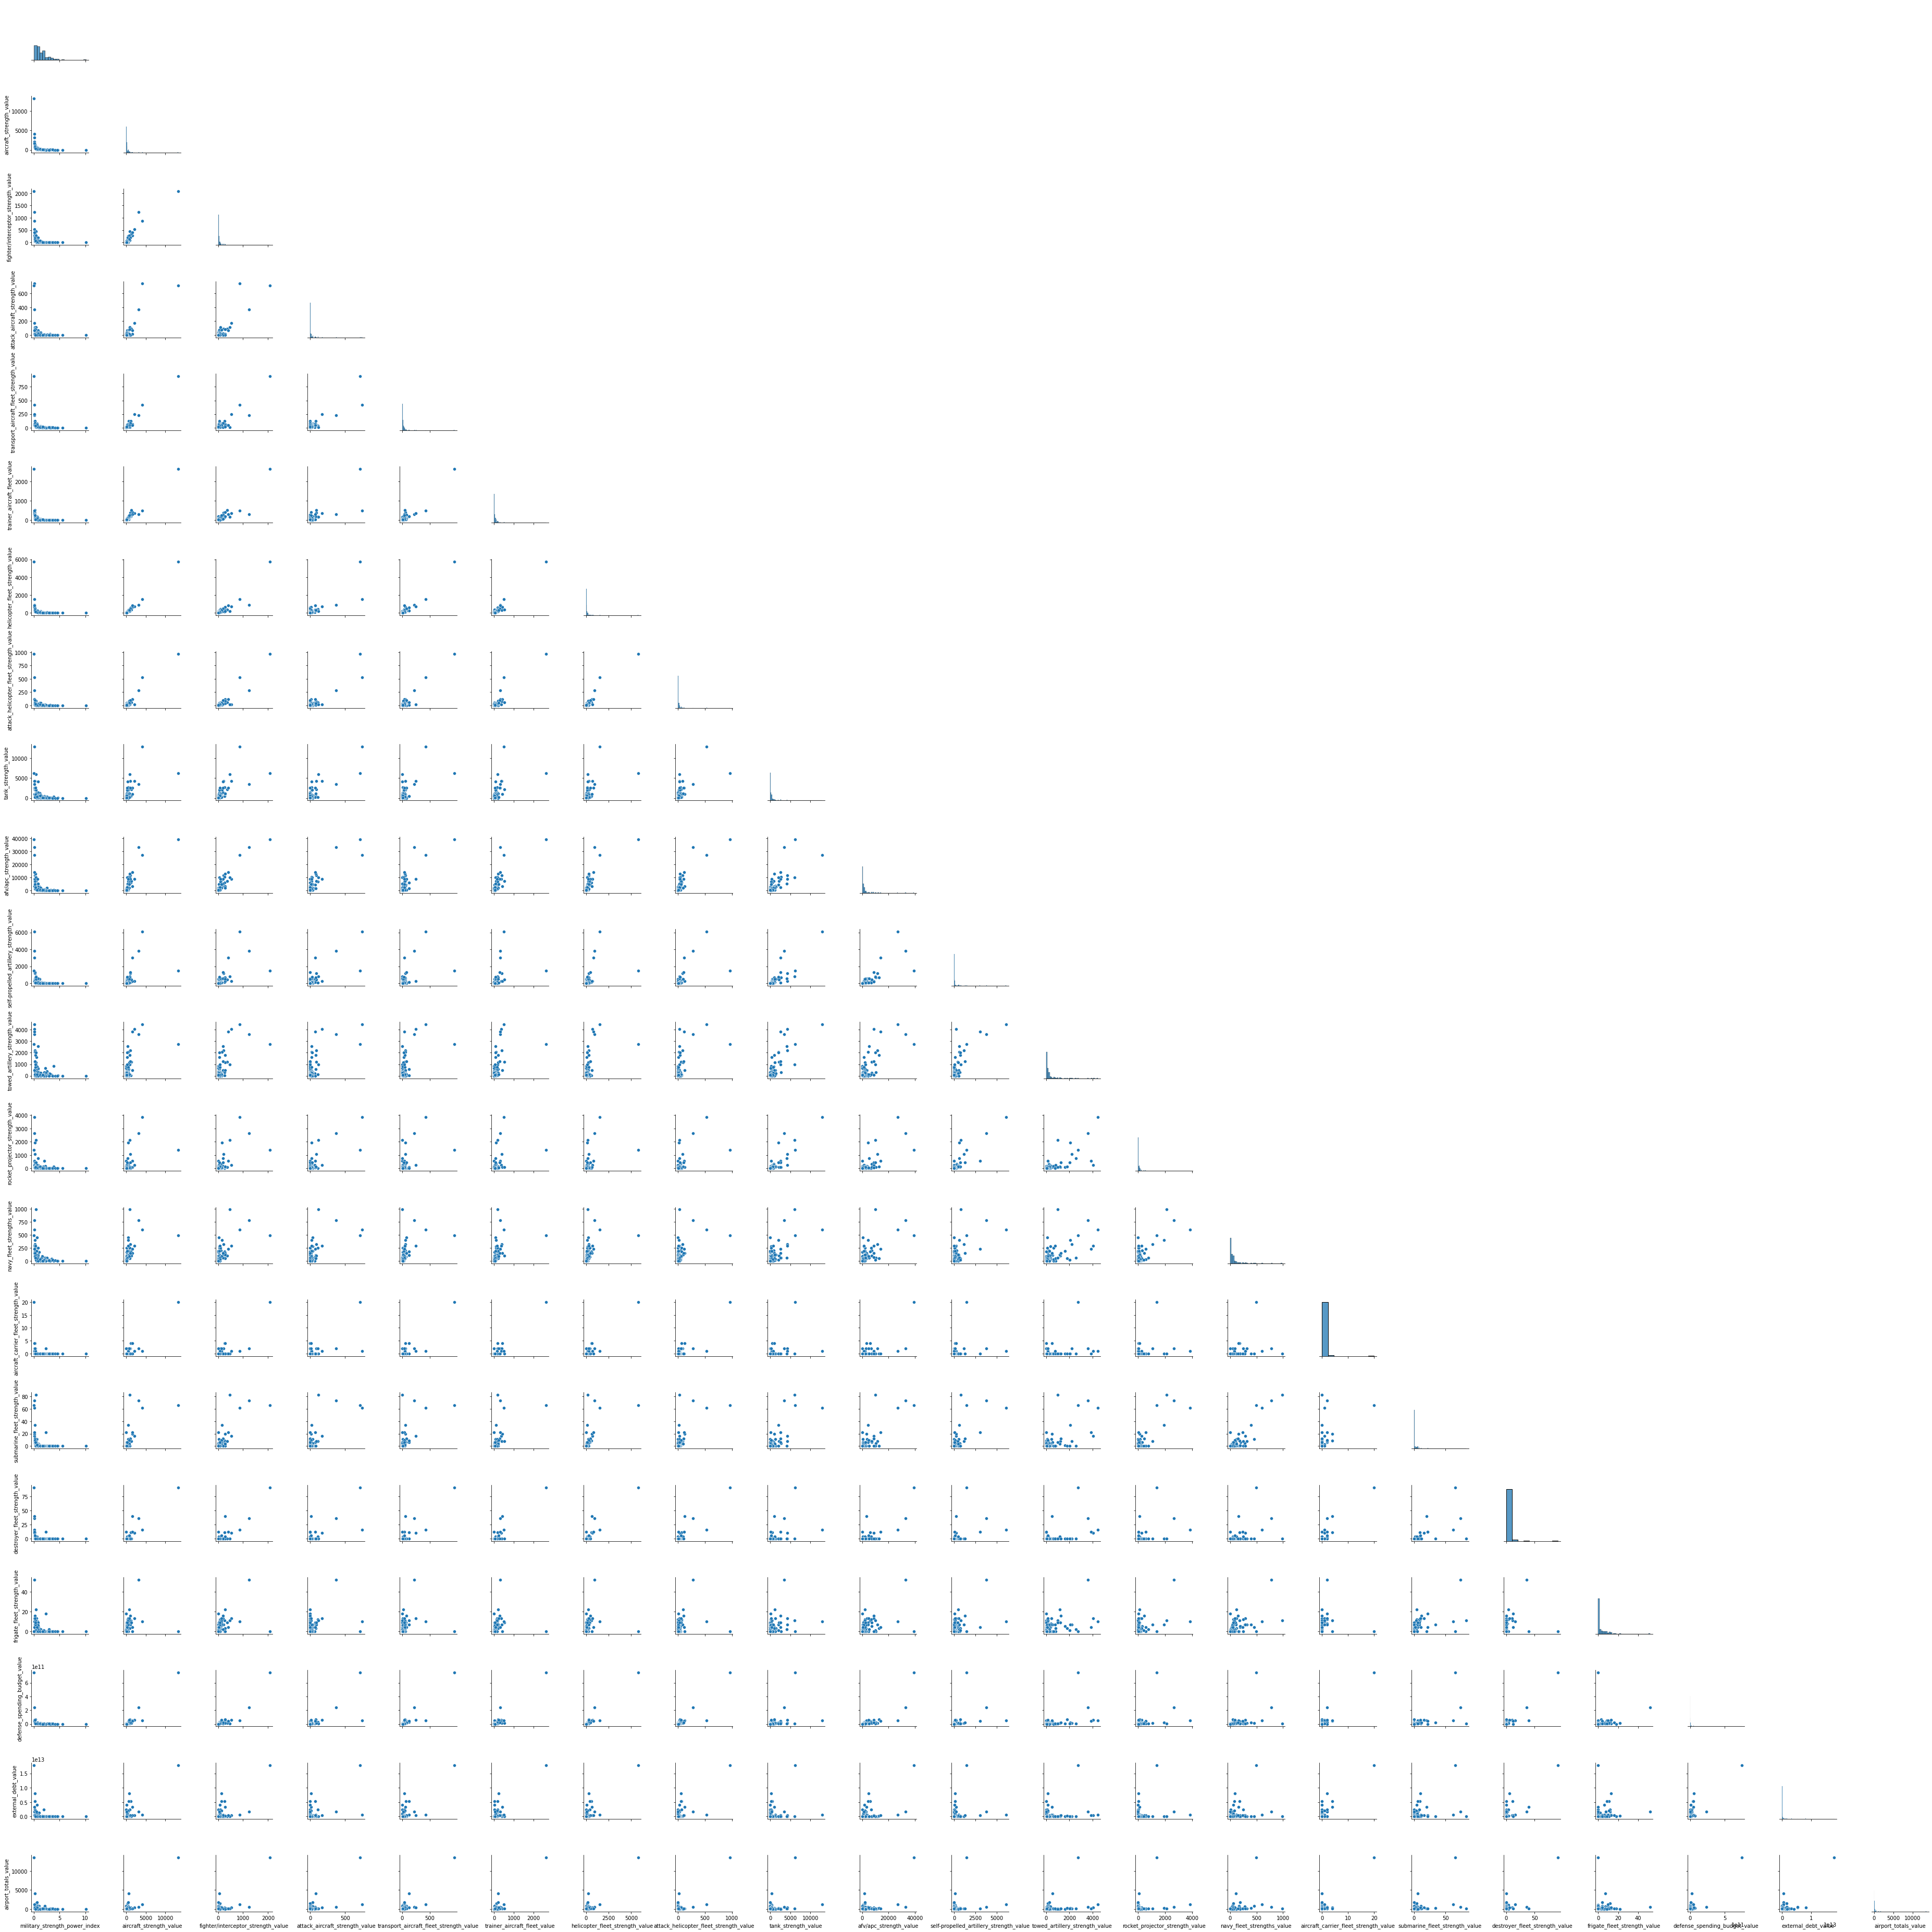

In [ ]:
sns.pairplot(df, palette="inferno", corner=True);

## Decriptive statistics

In [ ]:
skew_vals = df.skew().sort_values(ascending=False)
skew_vals

defense_spending_budget_value             9.959
airport_totals_value                      9.845
aircraft_carrier_fleet_strength_value     9.772
helicopter_fleet_strength_value           9.497
trainer_aircraft_fleet_value              9.035
aircraft_strength_value                   8.789
transport_aircraft_fleet_strength_value   7.951
attack_helicopter_fleet_strength_value    7.883
destroyer_fleet_strength_value            7.728
external_debt_value                       7.052
attack_aircraft_strength_value            6.489
self-propelled_artillery_strength_value   6.258
fighter/interceptor_strength_value        6.226
rocket_projector_strength_value           5.345
tank_strength_value                       5.082
submarine_fleet_strength_value            4.675
afv/apc_strength_value                    4.582
frigate_fleet_strength_value              4.564
navy_fleet_strengths_value                3.805
towed_artillery_strength_value            3.292
military_strength_power_index           

In [ ]:
skew_limit = 0.5 # This is our threshold-limit 
skew_vals = df.skew()
skew_cols = skew_vals[abs(skew_vals)> skew_limit].sort_values(ascending=False)
skew_cols 

defense_spending_budget_value             9.959
airport_totals_value                      9.845
aircraft_carrier_fleet_strength_value     9.772
helicopter_fleet_strength_value           9.497
trainer_aircraft_fleet_value              9.035
aircraft_strength_value                   8.789
transport_aircraft_fleet_strength_value   7.951
attack_helicopter_fleet_strength_value    7.883
destroyer_fleet_strength_value            7.728
external_debt_value                       7.052
attack_aircraft_strength_value            6.489
self-propelled_artillery_strength_value   6.258
fighter/interceptor_strength_value        6.226
rocket_projector_strength_value           5.345
tank_strength_value                       5.082
submarine_fleet_strength_value            4.675
afv/apc_strength_value                    4.582
frigate_fleet_strength_value              4.564
navy_fleet_strengths_value                3.805
towed_artillery_strength_value            3.292
military_strength_power_index           

In [ ]:
for skew in skew_vals:
    if -0.5 < skew < 0.5:
        print ("A skewness value of", '\033[1m',skew, '\033[0m', "means that the distribution is approx.", '\033[1m', "symmetric", '\033[0m')
    elif  -0.5 < skew < -1.0 or 0.5 < skew < 1.0:
        print ("A skewness value of", '\033[1m', skew, '\033[0m', "means that the distribution is approx.", '\033[1m', "moderately skewed", '\033[0m')
    else:
        print ("A skewness value of", '\033[1m',skew, '\033[0m', "means that the distribution is approx.", '\033[1m',"highly skewed", '\033[0m')

A skewness value of  2.6706592171090633  means that the distribution is approx.  highly skewed 
A skewness value of  8.789333213231357  means that the distribution is approx.  highly skewed 
A skewness value of  6.225776745899961  means that the distribution is approx.  highly skewed 
A skewness value of  6.489261954280916  means that the distribution is approx.  highly skewed 
A skewness value of  7.95096255063359  means that the distribution is approx.  highly skewed 
A skewness value of  9.035121167203796  means that the distribution is approx.  highly skewed 
A skewness value of  9.496532868859475  means that the distribution is approx.  highly skewed 
A skewness value of  7.882557750772219  means that the distribution is approx.  highly skewed 
A skewness value of  5.081714659457636  means that the distribution is approx.  highly skewed 
A skewness value of  4.582304838220883  means that the distribution is approx.  highly skewed 
A skewness value of  6.257622099771748  means that

In [ ]:
kurtosis_vals = df.kurtosis().sort_values(ascending=False)
kurtosis_vals

defense_spending_budget_value             106.869
airport_totals_value                      105.399
aircraft_carrier_fleet_strength_value     105.211
helicopter_fleet_strength_value           100.829
trainer_aircraft_fleet_value               94.603
aircraft_strength_value                    88.850
transport_aircraft_fleet_strength_value    73.350
attack_helicopter_fleet_strength_value     69.606
destroyer_fleet_strength_value             68.279
external_debt_value                        59.907
fighter/interceptor_strength_value         46.648
self-propelled_artillery_strength_value    45.347
attack_aircraft_strength_value             45.044
tank_strength_value                        33.708
rocket_projector_strength_value            32.166
frigate_fleet_strength_value               31.422
afv/apc_strength_value                     24.631
submarine_fleet_strength_value             22.970
navy_fleet_strengths_value                 17.695
military_strength_power_index              13.139


In [ ]:
kurtosis_limit = 7 # This is our threshold-limit to evaluate skewness. Overall below abs(1) seems acceptable for the linear models.
kurtosis_vals = df.kurtosis()
kurtosis_cols = kurtosis_vals[abs(kurtosis_vals) > kurtosis_limit].sort_values(ascending=False)
kurtosis_cols

defense_spending_budget_value             106.869
airport_totals_value                      105.399
aircraft_carrier_fleet_strength_value     105.211
helicopter_fleet_strength_value           100.829
trainer_aircraft_fleet_value               94.603
aircraft_strength_value                    88.850
transport_aircraft_fleet_strength_value    73.350
attack_helicopter_fleet_strength_value     69.606
destroyer_fleet_strength_value             68.279
external_debt_value                        59.907
fighter/interceptor_strength_value         46.648
self-propelled_artillery_strength_value    45.347
attack_aircraft_strength_value             45.044
tank_strength_value                        33.708
rocket_projector_strength_value            32.166
frigate_fleet_strength_value               31.422
afv/apc_strength_value                     24.631
submarine_fleet_strength_value             22.970
navy_fleet_strengths_value                 17.695
military_strength_power_index              13.139


# Data Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, scale

In [ ]:
df1=df.copy()

In [ ]:
df1.reset_index(inplace=True)

In [ ]:
df.head(1)

,military_strength_power_index,aircraft_strength_value,fighter/interceptor_strength_value,attack_aircraft_strength_value,transport_aircraft_fleet_strength_value,trainer_aircraft_fleet_value,helicopter_fleet_strength_value,attack_helicopter_fleet_strength_value,tank_strength_value,afv/apc_strength_value,self-propelled_artillery_strength_value,towed_artillery_strength_value,rocket_projector_strength_value,navy_fleet_strengths_value,aircraft_carrier_fleet_strength_value,submarine_fleet_strength_value,destroyer_fleet_strength_value,frigate_fleet_strength_value,defense_spending_budget_value,external_debt_value,airport_totals_value,oil_production_value,oil_consumption_value,proven_oil_reserves_value,available_manpower_value,total_population_value
country,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.344,260.000,0.000,25.000,30.000,0.000,187.000,0.000,0.000,1062.000,0.000,176.000,50.000,0.000,0.000,0.000,0.000,0.000,12000000000.000,2840000000.000,43.000,0.000,5500.000,0.000,"1,43,25,743","3,49,40,837"


In [ ]:
X = df1.drop(["country"], axis = 1)

In [ ]:
scaler = scale

In [ ]:
X_scaled = pd.DataFrame(scaler(X))

ValueError: ignored

In [ ]:
X_scaled.head(1)

NameError: ignored

# Modelling

## Hopkins Test 
#### Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability, a score tending to 1 express an uniform distrubution so clustering can't be useful and  0 express  not an uniform distrubution hence clusterering can be useful.

In [ ]:
!pip install pyclustertend 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pyclustertend import hopkins

In [ ]:
hopkins(df, df.shape[0])

ValueError: ignored

## Clustering with K-means

In [ ]:
K_means_model = KMeans(random_state = 101)

NameError: ignored

In [ ]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=101)
    model.fit(X_scaled)
    ssd.append(model.inertia_)

NameError: ignored

### Elbow Method 
### We use this method to find optimal k value by looking up to break point of graph. 

### Model Building and label visualisation

### Evaluate 

## Hierarchical Clustering

### Dendogram

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
hc_ward = linkage(y = df2, method = "ward")
hc_complete = linkage(df2, "complete")
hc_average = linkage(df2, "average")
hc_single = linkage(df2, "single")

In [ ]:
plt.figure(figsize = (14,7))
dendrogram(hc_ward, leaf_font_size = 10);

In [ ]:
plt.figure(figsize = (14,7))
dendrogram(hc_ward,
           truncate_mode = "lastp",
           p = 10,
           show_contracted = True,
           leaf_font_size = 10);

NameError: ignored

<Figure size 1008x504 with 0 Axes>

In [ ]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

In [ ]:
sns.clustermap(df2);

NameError: ignored

In [ ]:
sns.clustermap(df2, col_cluster=False);

In [ ]:
sns.clustermap(df2, row_cluster=False);

### Model Building and label visualisation

In [ ]:
from sklearn.cluster import AgglomerativeClustering

### Evaluate 